In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import pandas as pd

### Importing Dataset

In [2]:
df = pd.read_csv("datasets/vgsales.csv")

### Reviewing Data

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

### Platforms pie chart

In [7]:
main_platforms = df['Platform'].value_counts().head(14)
all_the_rest = df['Platform'].value_counts().tail(17).sum()
pie_data = main_platforms.append(pd.Series({'Others':all_the_rest}))

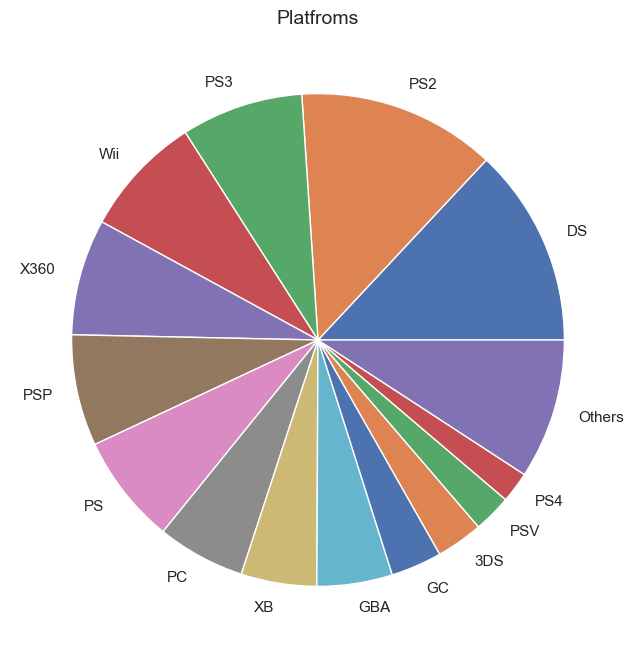

In [8]:
sns.set()
pie_data.plot.pie(figsize=(8,8), label = '')
plt.title('Platfroms', fontsize = 14)
plt.show()

### Defining Global Sales per Genre

In [9]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [10]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [11]:
genre_group = df.groupby('Genre')
global_sales_per_genre = genre_group['Global_Sales'].sum().sort_values(ascending=False).reset_index()

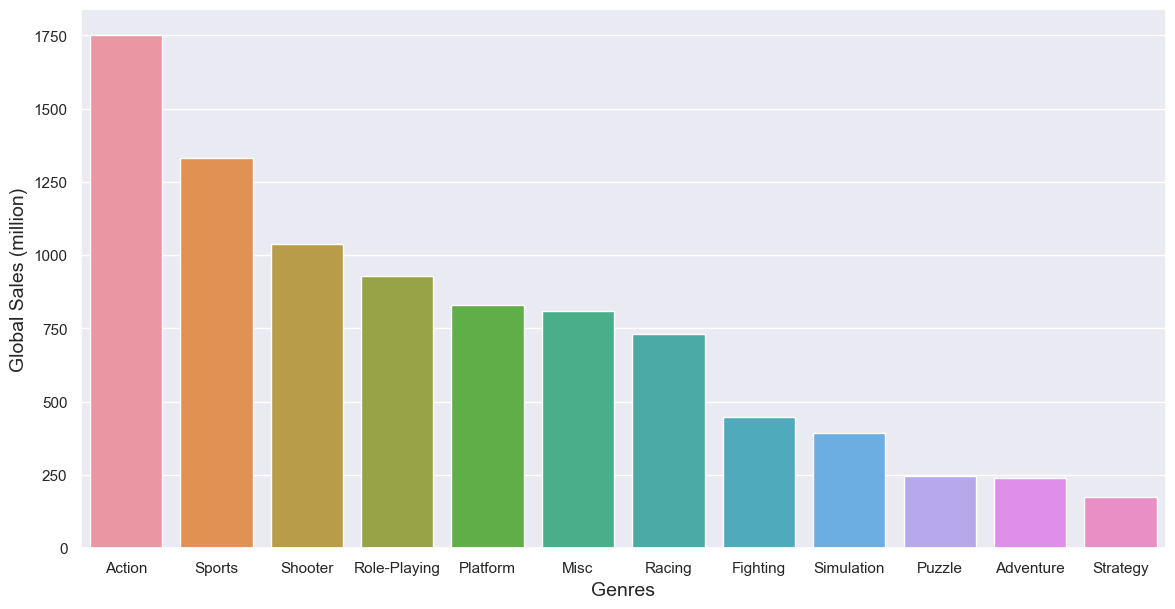

In [12]:
plt.figure(figsize=(14,7))
sns.barplot(data = global_sales_per_genre, x='Genre', y='Global_Sales')
plt.ylabel('Global Sales (million)', fontsize = 14)
plt.xlabel('Genres', fontsize = 14)
plt.show()

### Best Seller Publishers

In [13]:
publisher_group = df.groupby('Publisher')
best_sellers = publisher_group['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

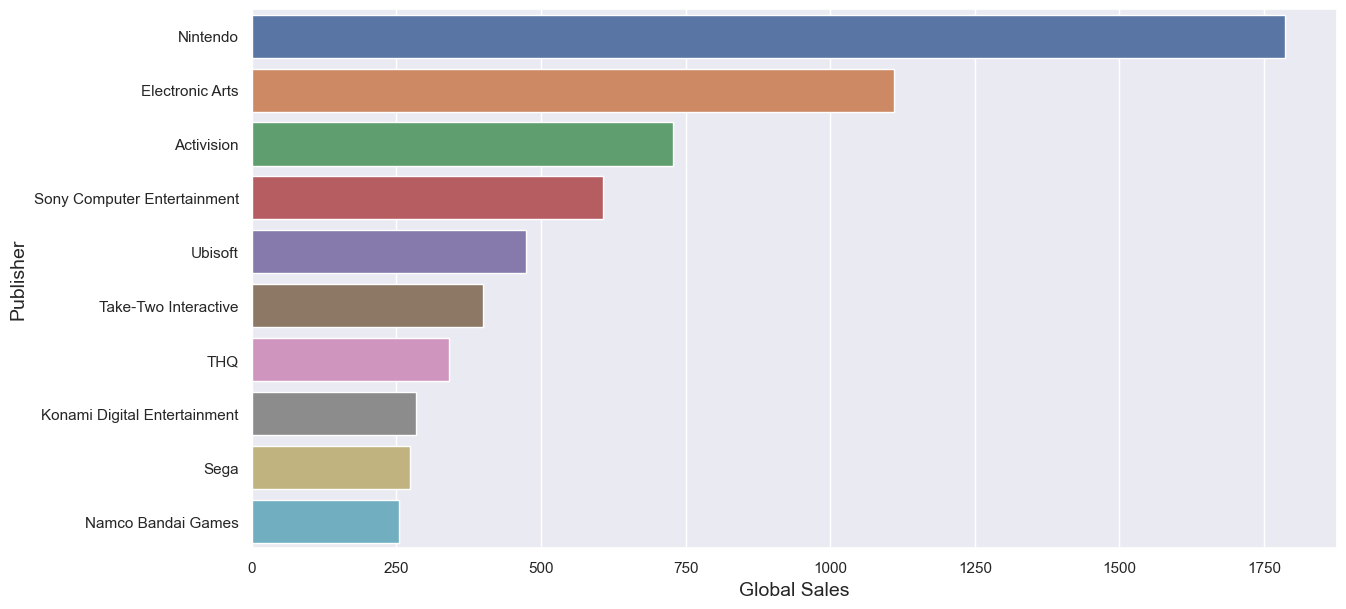

In [14]:
plt.figure(figsize=(14,7))
sns.barplot(data = best_sellers, x='Global_Sales', y='Publisher')
plt.xlabel('Global Sales', fontsize = 14)
plt.ylabel('Publisher', fontsize = 14)
plt.show()